# Game Matrix Solver Accuracy Analysis
This tutorial compares the accuracies of serveral Nash solvers for game matrix. 

In [3]:
import numpy as np
# ! pip install pandas
import pandas as pd
GameMatrix = np.array([[2,1], [1,1]])
# GameMatrix = np.array([[0,2,-1], [-1,0,1], [1,-1,0]])

NumAgents = 2

print('Game matrix: ')
pd.DataFrame(GameMatrix)


Game matrix: 


,0,1
0,2,1
1,1,1


In [12]:
import sys
sys.path.append("../..")  # get mars folder
from mars.equilibrium_solver import NashEquilibriumECOSSolver, NashEquilibriumMWUSolver

ne_ecos, ne_value_ecos = NashEquilibriumECOSSolver(GameMatrix)
ne_mwu, ne_value_mwu = NashEquilibriumMWUSolver(GameMatrix, Itr=10)
print(f"Nash strategies solved by two solvers: \nECOS {ne_ecos}, \nMWU {ne_mwu}")


Nash strategies solved by two solvers: 
ECOS (array([0.5157873, 0.4842127]), array([3.28893813e-11, 1.00000000e+00])), 
MWU [[0.61388123 0.38611877]
 [0.27438053 0.72561947]]


In [29]:
import numpy as np

def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def random_game_matrix(dim, number=1):
    """ retrun dim*dim uniform payoff matrix for max player."""    
    rand_matrices = np.random.uniform(-1,1, size=(number, dim, dim))
    print(rand_matrices.shape)
    return rand_matrices


def compare_solvers(mwu_itr=10):
    number_tests = 1000
    dim = 3 # number of actions per player

    test_matrices = random_game_matrix(dim, number_tests)
    avg_kl = []
    for matrix in test_matrices:
        ne_ecos, ne_value_ecos = NashEquilibriumECOSSolver(matrix)
        ne_mwu, ne_value_mwu = NashEquilibriumMWUSolver(matrix, Itr=mwu_itr)
        players_kl = []
        for ecos_pi, mwu_pi in zip(ne_ecos, ne_mwu):
            players_kl.append(kl(ecos_pi, mwu_pi))
        avg_kl.append(np.mean(players_kl))  # average over two players

    print(f'avg. kl: {np.mean(avg_kl)}')
    return np.mean(avg_kl)



(1000, 3, 3)


/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/ecos/ecos.py:26: UserWarning: Converting G to a CSC matrix; may take a while.
  warn("Converting G to a CSC matrix; may take a while.")
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/ecos/ecos.py:29: UserWarning: Converting A to a CSC matrix; may take a while.
  warn("Converting A to a CSC matrix; may take a while.")


avg. kl: 0.3019965753128616
(1000, 3, 3)
avg. kl: 0.24413487095101347
(1000, 3, 3)
avg. kl: 0.20543419958894316
(1000, 3, 3)
avg. kl: 0.1912415608699278
(1000, 3, 3)
avg. kl: 0.17293169280343176
(1000, 3, 3)
avg. kl: 0.1611522225412801
(1000, 3, 3)
avg. kl: 0.15708570694260807
(1000, 3, 3)
avg. kl: 0.15661327749750584
(1000, 3, 3)
avg. kl: 0.14222384674579025


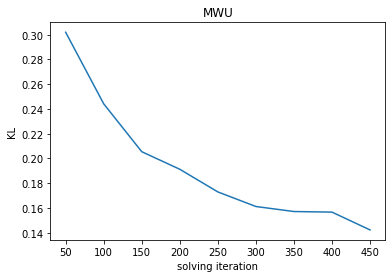

In [30]:
# MWU solver with different iterations
# evaluated by KL divergence of nash strategies by MWU and ECOS (as oracle)
import matplotlib.pyplot as plt

kl_list = []
itr_list = []
for i in range(1, 10):
    itr = i*50
    itr_list.append(itr)
    kl_list.append(compare_solvers(itr))

# for itr in [500, 1000]:
#     itr_list.append(itr)
#     kl_list.append(compare_solvers(itr))
plt.title('MWU')
plt.xlabel('solving iteration')
plt.ylabel('KL')
plt.plot(itr_list,kl_list)
plt.savefig('mwu_different_itr.png')
